<a href="https://colab.research.google.com/github/saieswaramurali/RECOGNITION_OF_TAMIL_CHARACTERS_USING_CNN/blob/main/RECOGNITION_OF_TAMIL_CHARACTERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# to create the dataset out of folders of images of the data
!pip install imutils

In [108]:
from imutils import paths
import cv2
import os

In [109]:
imagepaths = list(paths.list_images("/content/drive/MyDrive/ML/tamilCharData"))

In [ ]:
print(imagepaths)

In [111]:
# function to convert rgb to grayscale

def rgb2gray(img) :
  r = img[ :, :, 0]
  g = img[ :, :, 1]
  b = img[ :, :, 2]

  return (0.2989 * r + 0.5870 * g + 0.1140 * b)


In [ ]:
#storing the image from the imagepaths

images = []

for image in imagepaths :
  try :
    img = cv2.imread(image) # reading and storing the images on the img literal
    img = rgb2gray(img) # converting the image to gray scale
    img = cv2.resize(img, (45,45)) # resizing them from 480,480 to 30,30 to reduce the computations
    images.append(img)
    print("image loaded")
  except Exception as e :
    print(f"you got {e} error")


In [113]:
images[0].shape

(45, 45)

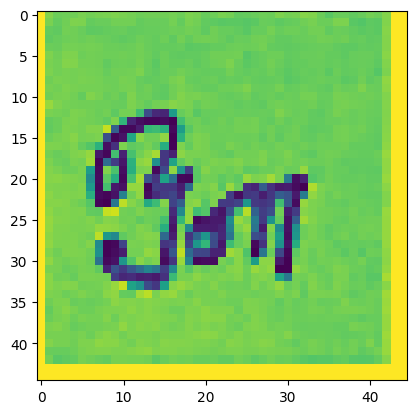

In [114]:
plt.imshow(images[550])

In [115]:
# to produce the label name using the name of image in the image path
labels = []

for i in imagepaths :
  labels.append(i[40::] )

print(labels[550])

12--3.jpg


In [116]:
def returnlabel(name) :
  index = 0
  while name[index] != "-" :
    index += 1
  name = name[0:index:1]
  return name



In [117]:
final_labels = []
for label in labels :
  lab = returnlabel(label)
  final_labels.append(lab)



In [118]:
labels = final_labels.copy()
labels[0]

'1'

In [ ]:
for i in labels :
  print(i)

In [120]:
# now splitting the training and splitting datasets
train_images = []
train_labels = []

for i in range(1000) :
  train_images.append(images[i])
  train_labels.append(int(labels[i]))

test_images = []
test_labels = []
for i in range(1000, 1200) :
  test_images.append(images[i])
  test_labels.append(int(labels[i]))


class_labels =  ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ']


In [ ]:
print(train_labels)

In [122]:
# assining the train_labels to 0-11 instead of 1-12
for i in range(len(train_labels)) :
  train_labels[i] -= 1


In [ ]:
print(train_labels)

ஆ


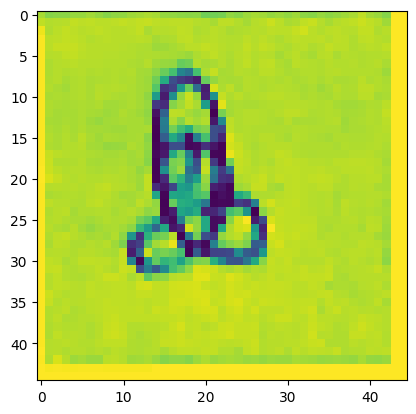

In [124]:
plt.imshow(train_images[100])
a = train_labels[100]
print(class_labels[a - 1])

In [125]:
X_train = np.array(train_images)
y_train = np.array(test_images)
X_train.shape, y_train.shape

X_train = X_train / 255  # feature scaling to reduce the magnitude of the weights involved in the network
y_train = y_train / 255  # ,,,


In [127]:

X_labels = np.array(train_labels)
y_labels = np.array(test_labels)

In [128]:
type(X_labels) , X_labels[100]


(numpy.ndarray, 2)

In [ ]:
print(X_train[125])

In [ ]:
print(X_labels)

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45,45,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))

# Compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [196]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 43, 43, 32)        320       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 21, 21, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 9, 9, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 3, 3, 128)       

In [197]:
model.fit(X_train, X_labels, epochs=10)

Epoch 1/10
32/32 [==============================] - 6s 141ms/step - loss: 2.4789 - accuracy: 0.1050
Epoch 2/10
32/32 [==============================] - 3s 86ms/step - loss: 2.2519 - accuracy: 0.2310
Epoch 3/10
32/32 [==============================] - 3s 85ms/step - loss: 1.8346 - accuracy: 0.3910
Epoch 4/10
32/32 [==============================] - 3s 86ms/step - loss: 1.5314 - accuracy: 0.4760
Epoch 5/10
32/32 [==============================] - 3s 103ms/step - loss: 1.0823 - accuracy: 0.6390
Epoch 6/10
32/32 [==============================] - 5s 142ms/step - loss: 0.8173 - accuracy: 0.7290
Epoch 7/10
32/32 [==============================] - 3s 95ms/step - loss: 0.6109 - accuracy: 0.7910
Epoch 8/10
32/32 [==============================] - 3s 85ms/step - loss: 0.4796 - accuracy: 0.8340
Epoch 9/10
32/32 [==============================] - 3s 85ms/step - loss: 0.3813 - accuracy: 0.8720
Epoch 10/10
32/32 [==============================] - 3s 93ms/step - loss: 0.2821 - accuracy: 0.9060


In [198]:
m = model.predict(y_train, verbose=1)
n = np.argmax(m[189])
print(m[0])

7/7 [==============================] - 0s 21ms/step
[8.1790137e-07 9.2269005e-08 1.7106527e-04 6.0239689e-09 2.1374500e-09
 3.6073015e-08 7.8890974e-07 3.9664604e-04 5.6062330e-04 1.1455250e-01
 8.8431102e-01 6.2563045e-06]


இ


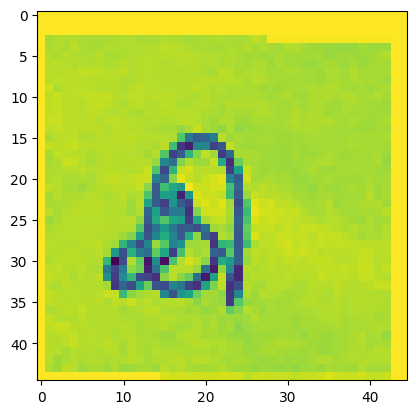

In [199]:
plt.imshow(y_train[189])
print(class_labels[n])

In [200]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(y_train)
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_labels, predicted_labels)


7/7 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2949 (\N{TAMIL LETTER A}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2950 (\N{TAMIL LETTER AA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2951 (\N{TAMIL LETTER I}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2952 (\N{TAMIL LETTER II}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2953 (\N{TAMIL LETTER U}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2954 

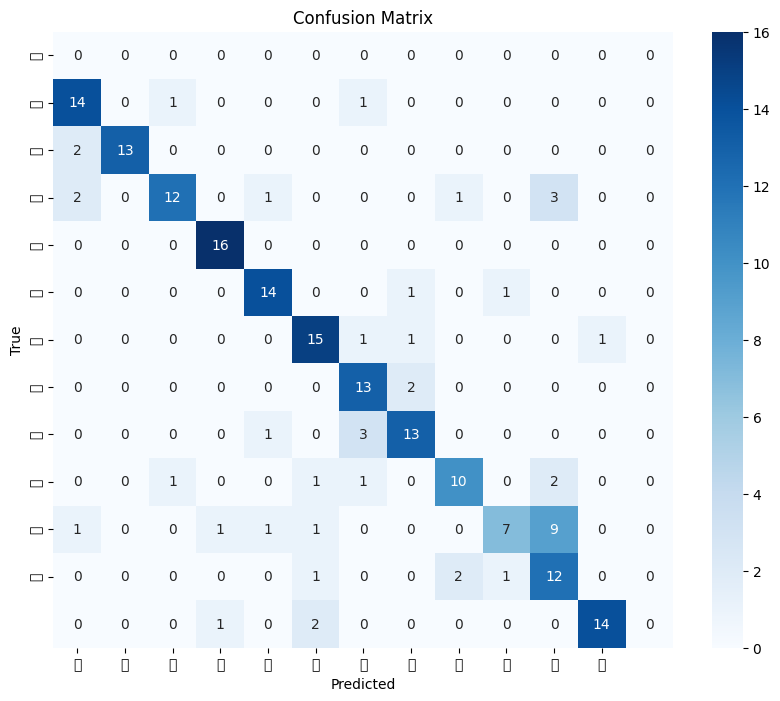

In [201]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [202]:

def evaluate(y_pred, y_real) :
  size = len(y_real)
  c = 0
  for i in range(len(y_real)) :
    if y_pred[i] == y_real[i] - 1 :
      c+=1
      #print(i)

  return float(c / size)



In [203]:
y_pred = []

for i in range(len(y_train)) :
  n = np.argmax(m[i])
  y_pred.append(n)

accuracy = evaluate(y_pred, list(y_labels))
accuracy


0.765